In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
from wordcloud import WordCloud, STOPWORDS

In [2]:
#df = pd.read_csv('spam_or_ham.csv',encoding= 'unicode_escape')
#df

In [3]:
df = pd.read_csv('spam_or_ham.csv',encoding= 'latin1')
df

,mail type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
spam = df[df['mail type'] == 'spam']
ham = df[df['mail type'] == 'ham']


## Visualisation

In [5]:
def show_wordcloud(df, title):
    text = ' '.join(df['message'].astype(str).tolist())
    stopwords = set(STOPWORDS)
    fig_wordcloud = WordCloud(stopwords=stopwords, 
                              background_color="white",
                              width = 2000, 
                              height = 2000).generate(text)
    plt.figure(figsize=(15,15), frameon=True)
    plt.imshow(fig_wordcloud, interpolation='bilinear')  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

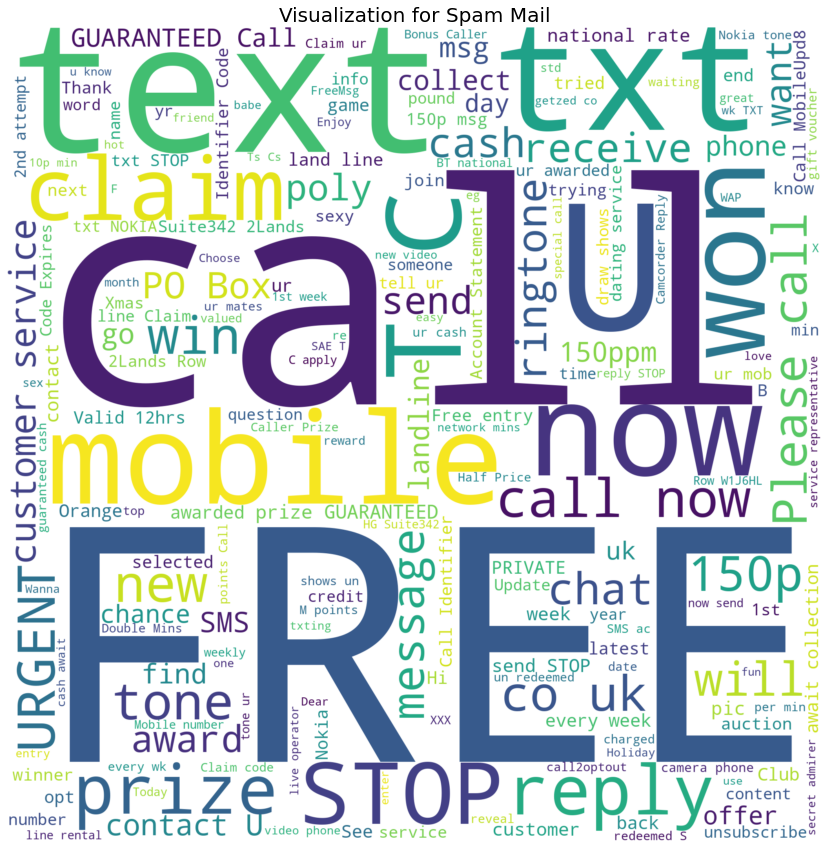

In [6]:
show_wordcloud(spam,"Visualization for Spam Mail")

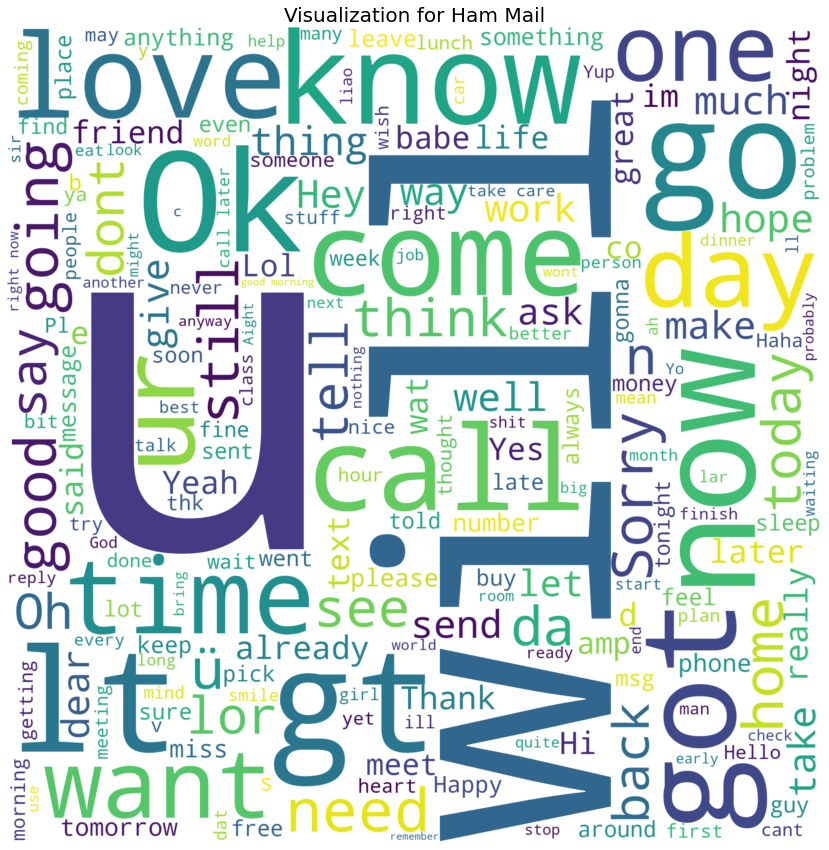

In [7]:
show_wordcloud(ham,"Visualization for Ham Mail")

In [8]:
# Conversion to lowercase
df['message'] = df['message'].str.lower()

In [9]:
# Removal of punctuation
df['message'] = df['message'].str.replace(r'[^\w\s]+', ' ')

In [11]:
#Removal of Numbers
df['message'] = df['message'].str.replace('\d+(\.\d+)?', ' ')

In [ ]:
# import nltk
# nltk.download('stopwords')

In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [13]:
df.head()

,mail type,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


In [14]:
# import nltk
# nltk.download('wordnet')

In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df['message'] = df['message'].apply(lambda x: ' '.join([lemmatizer.lemmatize(y,'v') for y in x.split()]))
df['message'] = df['message'].apply(lambda x: ' '.join([lemmatizer.lemmatize(y,'n') for y in x.split()]))

In [16]:
df

,mail type,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joke wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf live around though
...,...,...
5567,spam,nd time try contact u u pound prize claim easy...
5568,ham,ü b go esplanade fr home
5569,ham,pity mood suggestion
5570,ham,guy bitch act like interest buy something else...


In [17]:
df['mail_type'] = df['mail type'].map( {'spam': 1, 'ham': 0})

In [18]:
df

,mail type,message,mail_type
0,ham,go jurong point crazy available bugis n great ...,0
1,ham,ok lar joke wif u oni,0
2,spam,free entry wkly comp win fa cup final tkts st ...,1
3,ham,u dun say early hor u c already say,0
4,ham,nah think go usf live around though,0
...,...,...,...
5567,spam,nd time try contact u u pound prize claim easy...,1
5568,ham,ü b go esplanade fr home,0
5569,ham,pity mood suggestion,0
5570,ham,guy bitch act like interest buy something else...,0
